In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PlateData import *

In [3]:
directory =  "/Users/sam/Dropbox (Harvard University)/Data/Mn_reporter_assay/"
filename = "SB_032922.xlsx"

RFU = read_Mn_assay_excel(filename, header_length=36, nrows = (153-38, 55-38, 117-38), directory=directory)
OD600 = read_Mn_assay_excel(filename, header_length=161, nrows = (153-38, 55-38, 117-38), directory=directory)

row_annotations = {'[MnCl2]': [np.nan, 1000, 100, 0, 1000, 100, 0, np.nan],
                   'use_row': [False, True, True, True, True, True, True, False],
                   'rep': [-1, 0, 0, 0, 1, 1, 1, -1]}
col_annotations = {'reporter': ['NaN'] + ['pSB1-EV', 'pSB1em2', 'pSB1em2', 'pSB1em2', 'pSB1em2', 'pSB1em2'] + ['NaN']*5,
                   'construct': ['NaN'] + ['EV', 'EV', 'DraNramp WT', 'DraNramp D56A', 'EleD', 'EleG'] + ['NaN']*5,
                   'sample': [0,1,2,3,4,5,6,0,0,0,0,0],
                   'use_col': [False, True, True, True, True, True, True, False, False, False, False, False]}

Exp = PlateAssay((OD600, RFU), df_keys=("OD", "RFU"), 
                 row_annotations=row_annotations, col_annotations=col_annotations)

Text(0, 0.5, '[$MnCl_2$] (µM)')

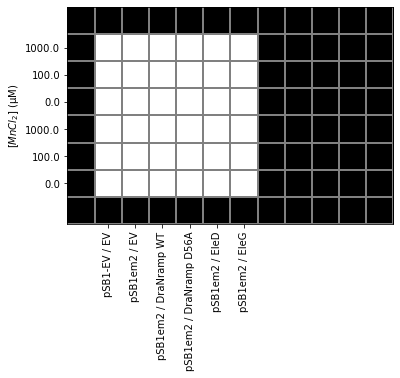

In [7]:
Exp.draw(row_annotations="[MnCl2]", col_annotations=("reporter", "construct"))
plt.ylabel("[$MnCl_2$] (µM)")

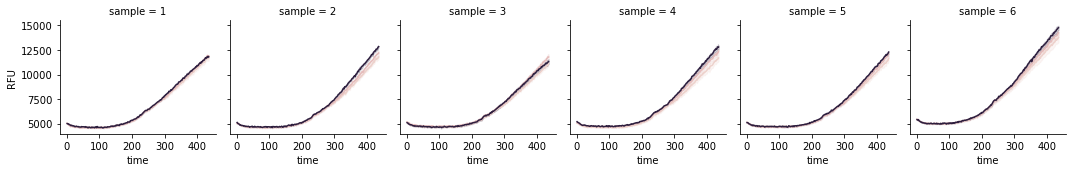

In [11]:
Exp.grid("RFU", hue="[MnCl2]", col="sample", aspect=1)